# __3. Credit Risk Modelling:__ Modelling and Metrics Evaluating
## by: __Aprian Immanuel__ (087785160835 / immanuelaprian@gmail.com)

In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve, recall_score, precision_score, confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Encoded_Modelling_Risk_Dataset.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

LN_ID  TARGET  contract_type_ord  gender_ord  num_of_children_ord  \
0  176791       0                  1           1                    1   
1  179136       0                  1           2                    1   
2  174883       0                  1           1                    3   
3  143055       0                  1           2                    2   
4  156172       0                  1           2                    1   

     INCOME  APPROVED_CREDIT  ANNUITY     PRICE  income_type_ord  ...  \
0  139500.0         339948.0  26437.5  315000.0                1  ...   
1  166500.0         450000.0  35685.0  450000.0                2  ...   
2  157500.0         225000.0  25384.5  225000.0                2  ...   
3   90000.0         152820.0  16344.0  135000.0                1  ...   
4  135000.0         345645.0  12546.0  243000.0                1  ...   

   PRICE_PREV_APP  weekdays_apply_prevapp_ord  hour_apply_prevapp_ord  \
0        61375.05                           7                       0   
1       112023.00                           4                       1   
2       107995.50                           2                       2   
3       137101.50                           3                       3   
4       104760.00                           5                       4   

   DAYS_DECISION  TERM_PAYMENT  yield_group_ord  FIRST_DRAW  FIRST_DUE  \
0          -2424          16.0                2    365243.0    -2393.0   
1           -627          12.0                1    365243.0     -590.0   
2          -1732          14.0                1    365243.0    -1701.0   
3          -1461          24.0                4    365243.0    -1430.0   
4          -1625          18.0                2    365243.0    -1594.0   

   TERMINATION  NFLAG_INSURED_ON_APPROVAL  
0      -1941.0                        1.0  
1       -288.0                        0.0  
2      -1398.0                        0.0  
3       -764.0                        0.0  
4      -1077.0                        0.0  

[5 rows x 44 columns]

## __1. Model Building & Hyperparameter Tuning__
### A. Logistic Regression Before Tuning

### Before we proceed, we realized that our dataset is imbalance. This will cause bad result for the Evaluation Metrics. We need to do something about it!

# Handling Imbalance Target
## **i. Oversampling using ``SMOTE``**
Oversampling, on the other hand, can lead to overfitting. Although, it’s been proved that adjusting the class distribution to the optimal one can improve drastically the performance, but find the best distribution is really difficult. Some dataset are more reactable to fully balanced distribution class, other instead gets greater performance with less skewed dataset. The researcher should find the better solution by trial and error and some heuristics

In this technique we calculate difference between sample under consideration and its nearest neighbors. Once the distance is calculated we multiply that with the number between 0 and 1. We add it to sample under consideration. Which gives us new sample point for minority class. Depending upon the amount of oversampling required, neighbours from k-NN are randomly chosen.


In [3]:
x = df[['income_type_ord', 'education_ord', 'DAYS_AGE', 'DAYS_WORK', 'INST_DAYS','EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3','APPLICATION', 'PRICE_PREV_APP']]
y = df['TARGET']  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [4]:
sm = SMOTE(random_state = 0)
x_train_sm, y_train_sm = sm.fit_sample(x_train, y_train)

In [5]:
# fitting model
model_LR_sm = LogisticRegression()
model_LR_sm.fit(x_train_sm, y_train_sm)

#prediksi
y_pred_sm = model_LR_sm.predict(x_test)

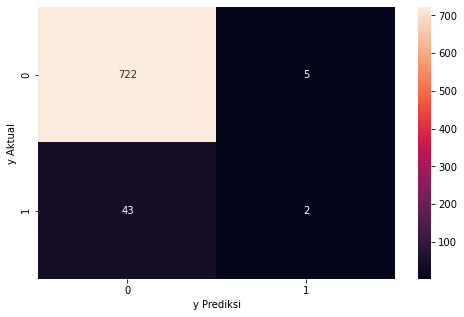

In [6]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_sm), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [7]:
print(classification_report(y_test, y_pred_sm))

precision    recall  f1-score   support

           0       0.94      0.99      0.97       727
           1       0.29      0.04      0.08        45

    accuracy                           0.94       772
   macro avg       0.61      0.52      0.52       772
weighted avg       0.91      0.94      0.92       772



In [8]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_sm)*100, recall_score(y_test, y_pred_sm)*100,
                    precision_score(y_test, y_pred_sm)*100, roc_auc_score(y_test, y_pred_sm)*100,
                     f1_score(y_test, y_pred_sm)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

Score (%)
accuracy       93.782383
recall          4.444444
precision      28.571429
roc_auc_score  51.878343
f1_score        7.692308

In [9]:
pd.DataFrame(data = [model_LR_sm.score(x_train, y_train)*100,
                     model_LR_sm.score(x_test, y_test)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score (%)']
            )

Score (%)
Model Score in Data Train  92.055772
Model Score in Data Test   93.782383

## **ii. Undersampling using ``NearMiss``**

NearMiss is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples. When instances of two different classes are very close to each other, we remove the instances of the majority class to increase the spaces between the two classes. This helps in the classification process.

In [10]:
nm = NearMiss()
x_train_nm, y_train_nm = nm.fit_sample(x_train, y_train)

In [11]:
# fitting model
model_LR_nm = LogisticRegression()
model_LR_nm.fit(x_train_nm, y_train_nm)

#prediksi
y_pred_nm = model_LR_nm.predict(x_test)

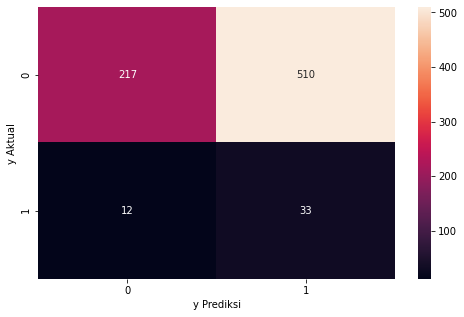

In [12]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_nm), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [13]:
print(classification_report(y_test, y_pred_nm))

precision    recall  f1-score   support

           0       0.95      0.30      0.45       727
           1       0.06      0.73      0.11        45

    accuracy                           0.32       772
   macro avg       0.50      0.52      0.28       772
weighted avg       0.90      0.32      0.43       772



In [14]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_nm)*100, recall_score(y_test, y_pred_nm)*100,
                    precision_score(y_test, y_pred_nm)*100, roc_auc_score(y_test, y_pred_nm)*100,
                     f1_score(y_test, y_pred_nm)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

Score (%)
accuracy       32.383420
recall         73.333333
precision       6.077348
roc_auc_score  51.591013
f1_score       11.224490

In [15]:
pd.DataFrame(data = [model_LR_nm.score(x_train, y_train)*100,
                     model_LR_nm.score(x_test, y_test)*100],
             index = ['Model Score in Data Train', 'Model Score in Data Test'],
             columns = ['Score (%)']
            )

Score (%)
Model Score in Data Train  32.490272
Model Score in Data Test   32.383420

### Oversampling technique has far better result than undersampling in handling imbalanced dataset. So, we decided to use oversampling technique in advance.

### B. Logistic Regression After Tuning

In [16]:
#parameter model linear regression yang akan dituned + value di setiap parameter
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]
#simpan dalam variable dengan nama 'param'
param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [17]:
# mencari parameter terbaik pada model: Logistic regression

model_LR = LogisticRegression()
model_LR_RS = RandomizedSearchCV(estimator = model_LR, param_distributions = param, cv = 5)

In [18]:
#with over sampling
model_LR_RS.fit(x_train_sm, y_train_sm)
model_LR_RS.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100}

In [19]:
model_LogReg_RS = LogisticRegression(solver='newton-cg', penalty='l2', max_iter=10000)
model_LogReg_RS.fit(x_train_sm, y_train_sm)

LogisticRegression(max_iter=10000, solver='newton-cg')

In [20]:
y_pred_RS = model_LogReg_RS.predict(x_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_RS)*100, recall_score(y_test, y_pred_RS)*100, 
                     precision_score(y_test, y_pred_RS)*100, roc_auc_score(y_test, y_pred_RS)*100, 
                     f1_score(y_test, y_pred_RS)*100],
            index = ['accuracy', 'recall_score', 'precision_score', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)'])

Score (%)
accuracy         69.559585
recall_score     64.444444
precision_score  11.693548
roc_auc_score    67.160324
f1_score         19.795222

In [21]:
pd.DataFrame(data=[model_LogReg_RS.score(x_train_sm, y_train_sm)*100,
                  model_LogReg_RS.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

Score (%)
Model Score in Data Train  74.748001
Model Score in Data Test   69.559585

### C. Random Forest Before Tuning

In [22]:
model_RFC = RandomForestClassifier()
model_RFC.fit(x_train_sm, y_train_sm)

RandomForestClassifier()

In [23]:
y_pred_RFC = model_RFC.predict(x_test)
y_pred_RFC

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

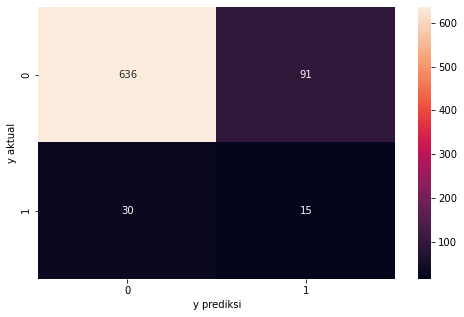

In [24]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RFC), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y prediksi')
plt.ylabel('y aktual')
plt.show()

In [25]:
# confusion matrix report

print(classification_report(y_test, y_pred_RFC))

precision    recall  f1-score   support

           0       0.95      0.87      0.91       727
           1       0.14      0.33      0.20        45

    accuracy                           0.84       772
   macro avg       0.55      0.60      0.56       772
weighted avg       0.91      0.84      0.87       772



In [26]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_RFC)*100, recall_score(y_test, y_pred_RFC)*100, precision_score(y_test, y_pred_RFC)*100, roc_auc_score(y_test, y_pred_RFC)*100, f1_score(y_test, y_pred_RFC)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

Score (%)
accuracy       84.326425
recall         33.333333
precision      14.150943
roc_auc_score  60.408070
f1_score       19.867550

In [27]:
pd.DataFrame(data=[model_RFC.score(x_train_sm, y_train_sm)*100,
                  model_RFC.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

Score (%)
Model Score in Data Train  100.000000
Model Score in Data Test    84.326425

### D. Random Forest After Tuning

In [28]:
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

param = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [29]:
#mencari parameter terbaik untuk model Random Forest Classifier
model_RF = RandomForestClassifier()
model_RF_RS = RandomizedSearchCV(estimator = model_RF, param_distributions = param, cv = 5)

In [30]:
model_RF_RS.fit(x_train_sm, y_train_sm)
model_RF_RS.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 60}

In [31]:
model_RF_new= RandomForestClassifier(max_depth=100,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=1200
)
model_RF_new.fit(x_train_sm, y_train_sm)

RandomForestClassifier(max_depth=100, n_estimators=1200)

In [32]:
# membuat prediksi dan fungsinya untuk mengevaluasi model (dibandingkan dengan y aktual)
y_pred_RF = model_RF_new.predict(x_test)
# jika ingin tahu probability dalam membuat tebakan
y_pred_proba_RF = model_RF_new.predict_proba(x_test)

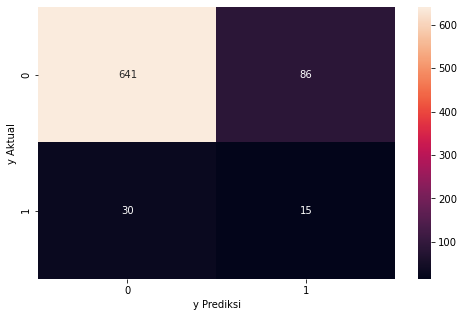

In [33]:
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [34]:
# confusion matrix report
print(classification_report(y_test, y_pred_RF))

precision    recall  f1-score   support

           0       0.96      0.88      0.92       727
           1       0.15      0.33      0.21        45

    accuracy                           0.85       772
   macro avg       0.55      0.61      0.56       772
weighted avg       0.91      0.85      0.88       772



In [35]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_RF)*100, recall_score(y_test, y_pred_RF)*100,
                     precision_score(y_test, y_pred_RF)*100, roc_auc_score(y_test, y_pred_RF)*100,
                    f1_score(y_test, y_pred_RF)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

Score (%)
accuracy       84.974093
recall         33.333333
precision      14.851485
roc_auc_score  60.751949
f1 score       20.547945

In [36]:
pd.DataFrame(data = [model_RF_new.score(x_train_sm, y_train_sm)*100, 
                     model_RF_new.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

Score (%)
Model Score in Data Train  100.000000
Model Score in Data Test    84.974093

### E. Decision Tree Classifier Before Tuning

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier()

In [38]:
y_pred_DTC = model_DTC.predict(x_test)


 Text(2645.512459371614, 3551.52, 'X[8] <= 43462.424\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(2637.366938472943, 3406.5600000000004, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(2653.6579802702854, 3406.5600000000004, 'X[2] <= -12690.0\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(2645.512459371614, 3261.6000000000004, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(2661.803501168957, 3261.6000000000004, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(2766.677082739351, 3551.52, 'X[0] <= 2.5\ngini = 0.283\nsamples = 164\nvalue = [136, 28]'),
 Text(2716.7857672349887, 3406.5600000000004, 'X[2] <= -16825.5\ngini = 0.199\nsamples = 134\nvalue = [119, 15]'),
 Text(2678.0945429662997, 3261.6000000000004, 'X[2] <= -17601.0\ngini = 0.457\nsamples = 17\nvalue = [11, 6]'),
 Text(2669.9490220676284, 3116.6400000000003, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(2686.240063864971, 3116.6400000000003, 'X[8] <= 86324.133\ngini = 0.48\nsamples = 10\nvalue = [4,

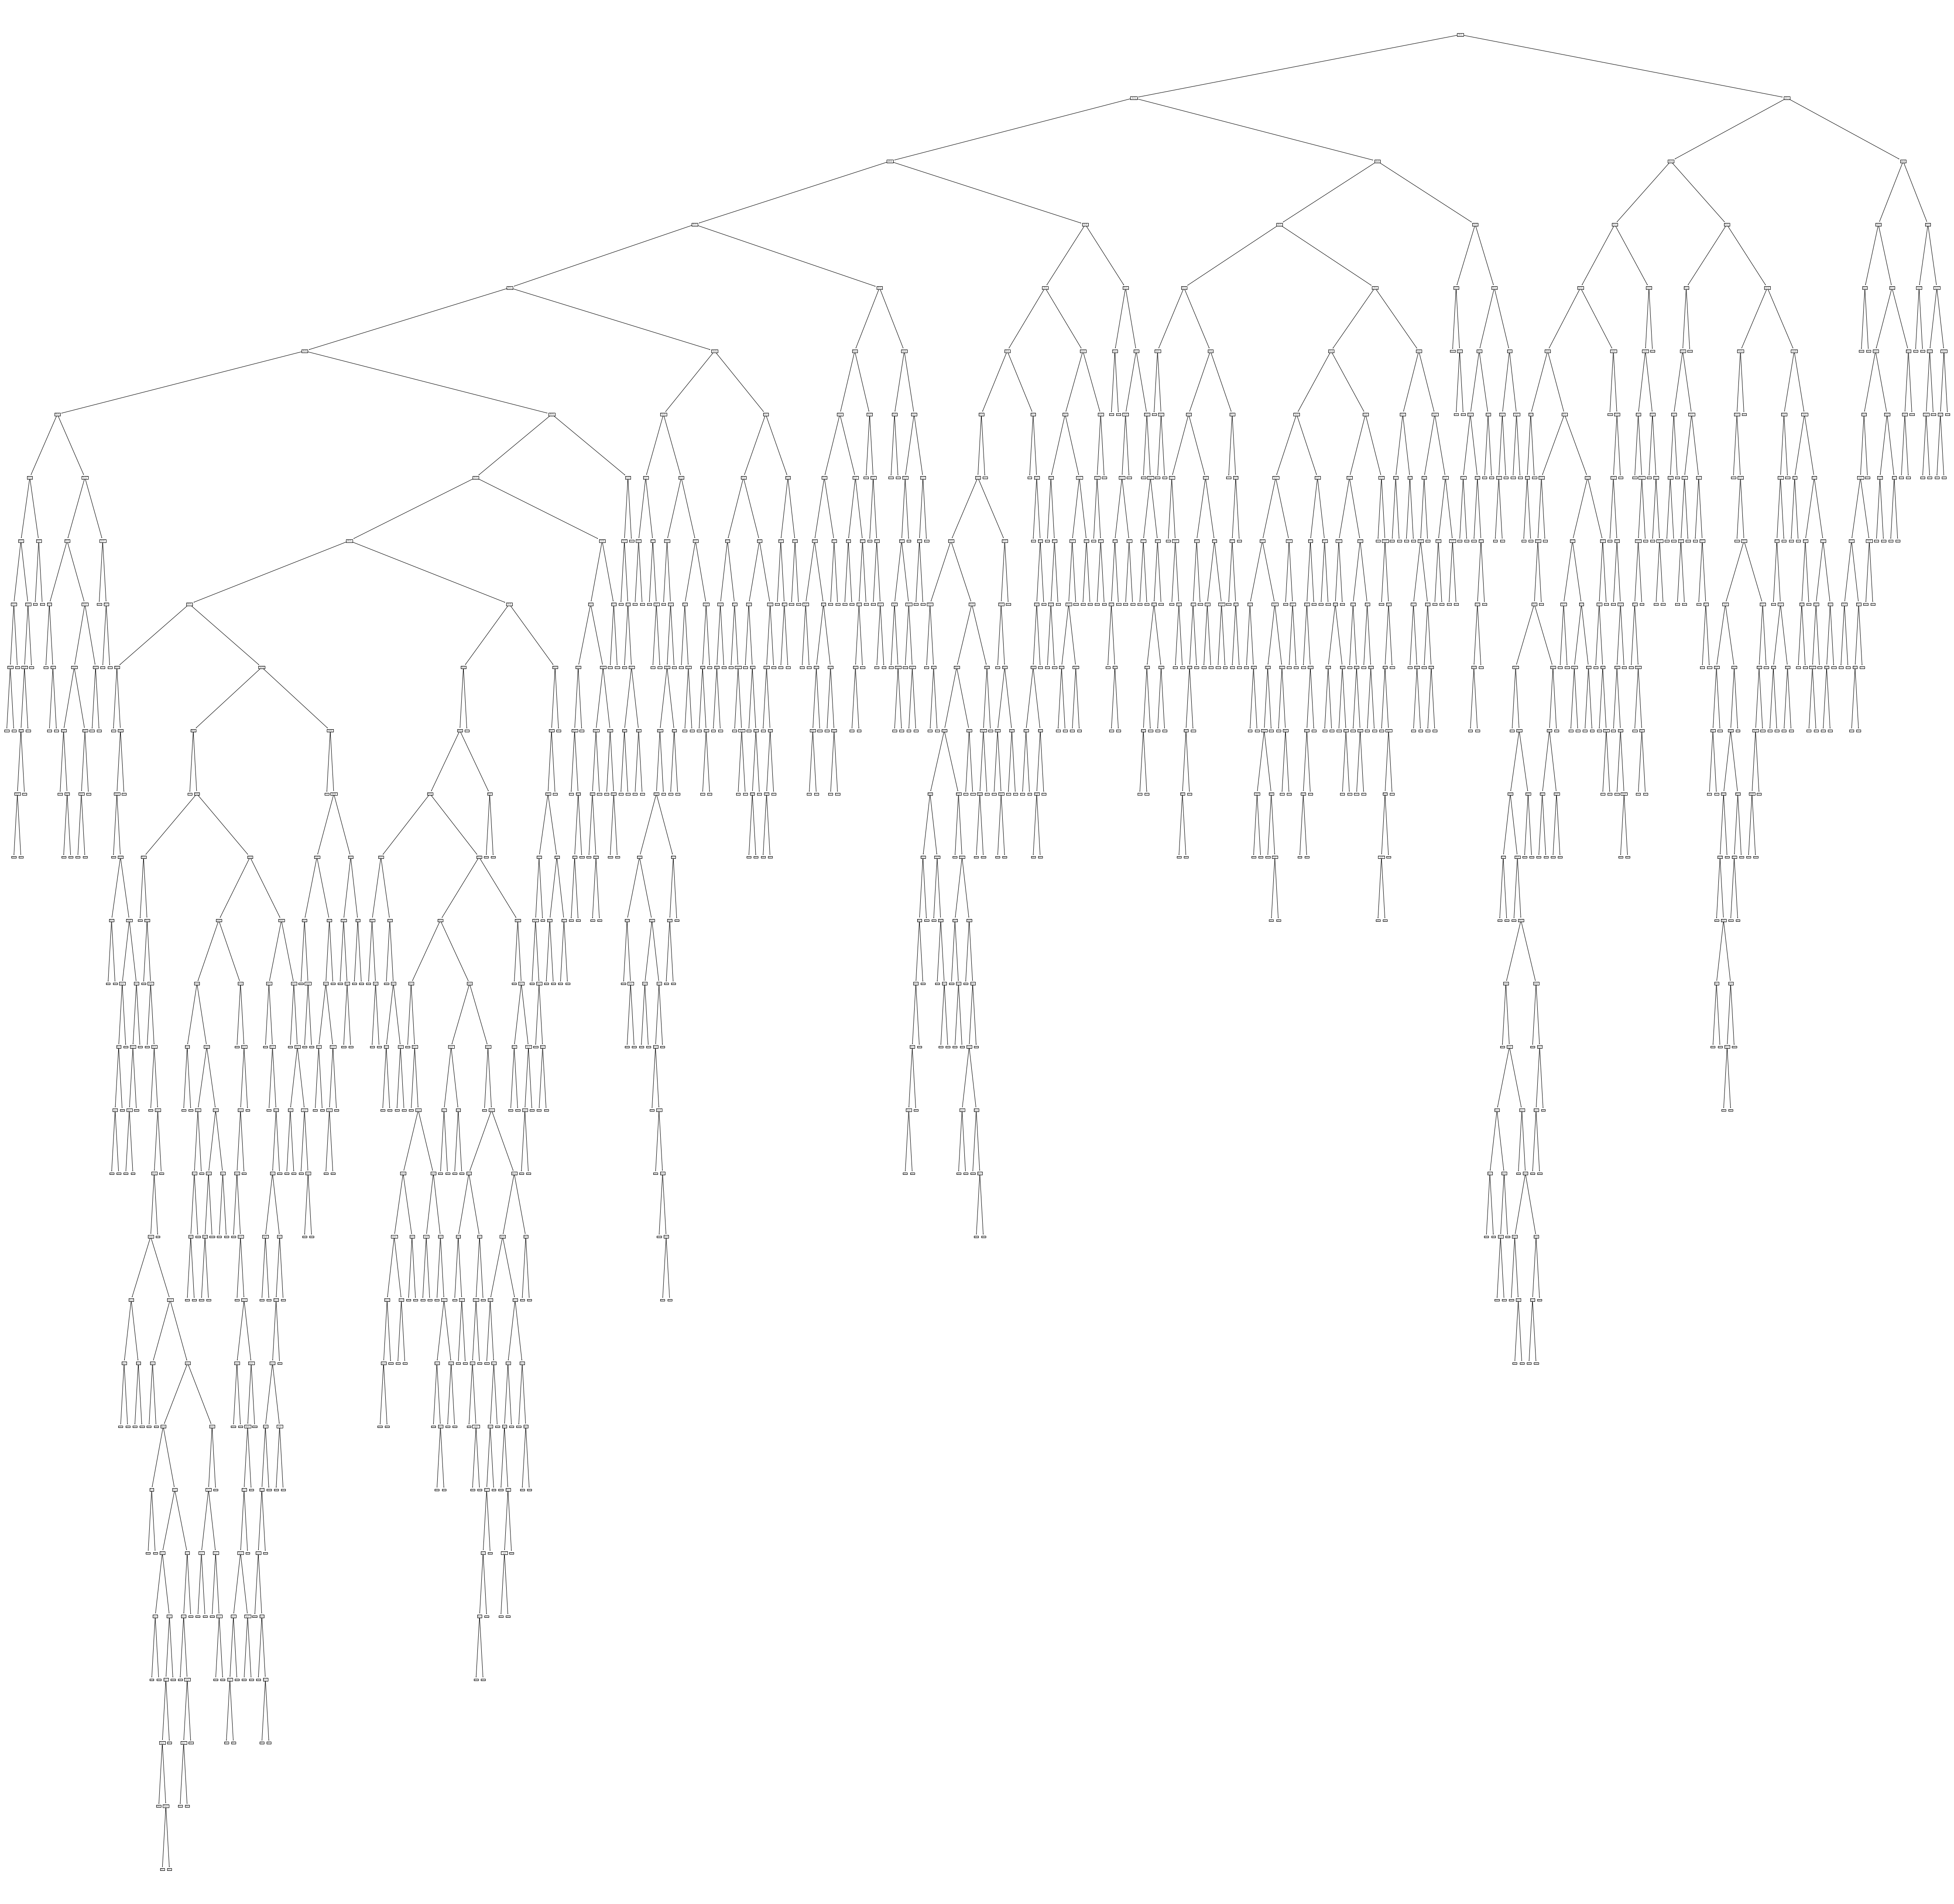

In [39]:
from sklearn import tree
plt.figure(figsize=(80, 80))
tree.plot_tree(model_DTC.fit(x_train_sm, y_train_sm))

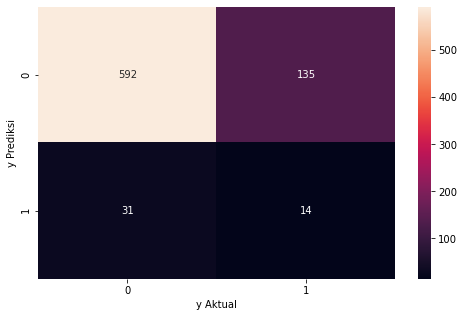

In [40]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_DTC), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Aktual')
plt.ylabel('y Prediksi')
plt.show()

In [41]:
# Confusion matrix report
print(classification_report(y_test, y_pred_DTC))

precision    recall  f1-score   support

           0       0.95      0.81      0.88       727
           1       0.09      0.31      0.14        45

    accuracy                           0.78       772
   macro avg       0.52      0.56      0.51       772
weighted avg       0.90      0.78      0.83       772



In [42]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_DTC)*100, recall_score(y_test, y_pred_DTC)*100, precision_score(y_test, y_pred_DTC)*100, roc_auc_score(y_test, y_pred_DTC)*100, f1_score(y_test, y_pred_DTC)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
             columns = ['Score (%)']
            )

Score (%)
accuracy       78.497409
recall         31.111111
precision       9.395973
roc_auc_score  56.270824
f1_score       14.432990

In [43]:
pd.DataFrame(data=[model_DTC.score(x_train_sm, y_train_sm)*100,
                  model_DTC.score(x_test, y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

Score (%)
Model Score in Data Train  100.000000
Model Score in Data Test    77.072539

### F. Decision Tree After Tuning

In [44]:
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]

param_DTC = {'criterion': criterion,
            'splitter': splitter,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [45]:
#mencari parameter terbaik untuk model Random Forest Classifier
model_DTC = DecisionTreeClassifier()
model_DTC_RS = RandomizedSearchCV(estimator = model_DTC, param_distributions = param_DTC, cv = 5)

In [46]:
model_DTC_RS.fit(x_train_sm, y_train_sm)
model_DTC_RS.best_params_

{'splitter': 'best',
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 90,
 'criterion': 'entropy'}

In [47]:
model_DTC_RS = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=1, max_depth=20, criterion='entropy', splitter='best')
model_DTC_RS.fit(x_train_sm, y_train_sm)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=5)

In [48]:
# membuat prediksi dan fungsinya untuk mengevaluasi model (dibandingkan dengan y aktual)
y_pred_DTC_new = model_DTC_RS.predict(x_test)
# jika ingin tahu probability dalam membuat tebakan
y_pred_proba_DTC = model_DTC_RS.predict_proba(x_test)

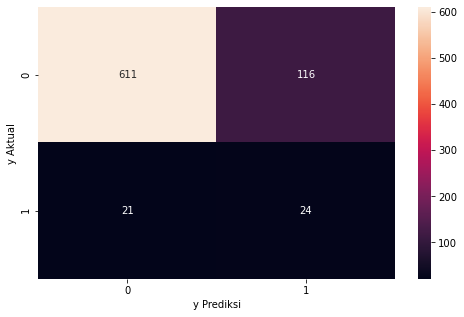

In [49]:
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_DTC_new), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [50]:
# confusion matrix report
print(classification_report(y_test, y_pred_DTC_new))

precision    recall  f1-score   support

           0       0.97      0.84      0.90       727
           1       0.17      0.53      0.26        45

    accuracy                           0.82       772
   macro avg       0.57      0.69      0.58       772
weighted avg       0.92      0.82      0.86       772



In [51]:
pd.DataFrame(data = [accuracy_score(y_test, y_pred_DTC_new)*100, recall_score(y_test, y_pred_DTC_new)*100,
                     precision_score(y_test, y_pred_DTC_new)*100, roc_auc_score(y_test, y_pred_DTC_new)*100,
                    f1_score(y_test, y_pred_DTC_new)*100],
             index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1 score'],
             columns = ['Score (%)']
            )

Score (%)
accuracy       82.253886
recall         53.333333
precision      17.142857
roc_auc_score  68.688675
f1 score       25.945946

In [52]:
pd.DataFrame(data=[model_DTC_RS.score(x_train_sm, y_train_sm)*100,
                  model_DTC_RS.score(x_test,
                   y_test)*100],
            index = ['Model Score in Data Train', 'Model Score in Data Test'],
            columns = ['Score (%)']
            )

Score (%)
Model Score in Data Train  97.949253
Model Score in Data Test   82.253886

## Note: 
#### In classification problems , we use two types of algorithms (dependent on the kind of output it creates):
#### `Class output:` Algorithms like SVM and KNN create a class output. For instance, in a binary classification problem, the outputs will be either 0 or 1. SKLearn's/Other algorithms can convert these class outputs to probability.
#### `Probability output:` Algorithms like Logistic Regression, Random Forest, Gradient Boosting, Adaboost etc. give probability outputs. Probability outputs can be converted to class output by creating a threshold probability.

#### In regression problems the output is always continuous in nature and requires no further treatment.
### `Null accuracy:`
Accuracy that could be achieved by always predicting the most frequent class. This means that a dumb model that always predicts 0/1 would be right "null_accuracy" % of the time.
### `Classification Accuracy:` 
Classification Accuracy or Accuracy is the ratio of number of correct predictions to the total number of input samples.

### `When to use accuracy metric:` 
When there are roughly equal number of samples belonging to each class.
### `When not to use accuracy metric:` 
When only one class holds majority of samples.
Example: Consider that there are 98% samples of class A and 2% samples of class B in our training set. Then our model can easily get 98% training accuracy by simply predicting every training sample belonging to class A.
When the same model is tested on a test set with 60% samples of class A and 40% samples of class B, then the test accuracy would drop down to 60%. Classification Accuracy may give us the false sense of achieving high accuracy.

### `ROC Curve`
ROC can be broken down into sensitivity and specificity. Choosing the best model is sort of a balance between predicting 1's accurately or 0's accurately. In other words sensitivity and specificity.
#### `True Positive Rate (Sensitivity/ Recall):` True Positive Rate is defined as TP/ (FN+TP). True Positive Rate corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points.
#### `False Positive Rate (Specificity):` False Positive Rate is defined as FP / (FP+TN). False Positive Rate corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points.
#### True Positive Rate and False Positive Rate both have values in the range [0, 1]. TPR and FPR both are computed at threshold values such as (0.00, 0.02, 0.04, …., 1.00) and a graph is drawn.
### `Interpreting ROC Plot:`
Interpreting the ROC plot is very different from a regular line plot. Because, though there is an X and a Y-axis, we don't read it as: for an X value of 0.25, the Y value is .9.
Instead, what we have here is a line that traces the probability cutoff from 1 at the bottom-left to 0 in the top right.
This is a way of analyzing how the sensitivity and specificity perform for the full range of probability cutoffs, that is from 0 to 1.
Ideally, if we have a perfect model, all the events will have a probability score of 1 and all non-events will have a score of 0. For such a model, the area under the ROC will be a perfect 1.
So, if we trace the curve from bottom left, the value of probability cutoff decreases from 1 towards 0. If we have a good model, more of the real events should be predicted as events, resulting in high sensitivity and low FPR. In that case, the curve will rise steeply covering a large area before reaching the top-right.
Therefore, the larger the area under the ROC curve, the better is the model.
The ROC curve is the only metric that measures how well the model does for different values of prediction probability cutoffs.

### `AUC` 
The probabilistic interpretation of ROC-AUC score is that if we randomly choose a positive case and a negative case, the probability that the positive case outranks the negative case according to the classifier is given by the AUC. Here, rank is determined according to order by predicted values.
ROC-AUC score is independent of the threshold set for classification because it only considers the rank of each prediction and not its absolute value. The same is not true for F1 score which needs a threshold value in case of probabilities output
AUC is the percentage of the ROC plot that is underneath the curve.
The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.
AUC is useful even when there is high class imbalance (unlike classification accuracy)
Fraud case
Null accuracy almost 99%
AUC is useful here
General AUC predictions:

### .90-1 = Excellent
### .80-.90 = Good
### .70-.80 = Fair
### .60-.70 = Poor
### .50-.60 = Fail

AUC ROC considers the predicted probabilities for determining the model’s performance. But, it only takes into account the order of probabilities and hence it does not take into account the model’s capability to predict higher probability for samples more likely to be positive(Log Loss).
Whereas the AUC is computed with regards to binary classification with a varying decision threshold, log loss actually takes “certainty” of classification into account.

### `Classification Report`
The classification_report() function displays the precision, recall, f1-score and support for each class.

### `Precision` 
It is the number of True Positive divided by the number of positive results predicted by the classifier.

### `Recall/ Sensitivity`
It is the number of True Positives divided by the number of all relevant samples (all samples that should have been identified as positive).
To minimising False Negatives, we would want our Recall to be as close to 100%
To minimising False Positives, we would want our Precision to be as close to 100%

### `F1 Score`
`F1 Score` is the Harmonic Mean between precision and recall. It tells how precise the classifier is (how many instances it classifies correctly), as well as how robust it is (it does not miss a significant number of instances).
### `When will we prefer F1 over ROC-AUC?`
Prefer PR curve whenever the positive class is rare or when we care more about the false positives than the false negatives.
### `The greater the F1 Score, the better is the performance of our model.`

### `Specificity / TNR (True Negative Rate)`
Proportion of actual negative cases which are correctly identified.
Specificity is the exact opposite of Recall.


## __Conclusion:__ Based on the modelling, The best model we recommend to use is Decision Tree Classifier with SMOTE Oversampling Algorithm and using Hyperparameter Tuning.

<hr>